In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Simple Pendulum with spring attached to it
**Equation of motion**
* 
\begin{equation} \label{1} \tag{1}
\boxed{\ddot \theta = -\frac{2}{l+r(t)}\dot r(t)\dot \theta-\frac{g}{l+r(t)}\sin{\theta}}
\end{equation}

* 
\begin{equation}\label{2} \tag{2}
\boxed{\ddot r(t)=(l+r(t))\dot \theta^2 + g \cos{\theta}-\frac{k}{m}r(t)}
\end{equation}

As equation \ref{1} is 2nd order homogeneous equation so we break it into two parts.
\begin{align}
\boxed{\frac{d \theta}{dt}= \omega} && \boxed{\frac{d \omega}{dt} = -\frac{2}{l+r(t)}\omega R-\frac{g}{l+r(t)}\sin{\theta}}
\end{align}
And equation \ref{2};
\begin{align}
\boxed{\frac{dr}{dt}= R} && \boxed{\frac{d R}{dt} = (l+r(t))\omega^2 + g \cos{\theta}-\frac{k}{m}r(t)}
\end{align}

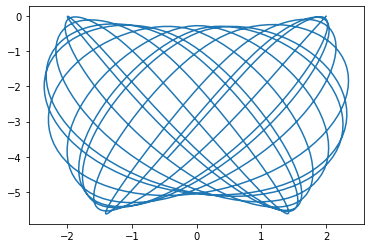

In [8]:
l = 1; g = 9.8; k = 10; m = 2

def dSdt(S, t):
    tht, w, r, R = S
    return [w,
           -(2*w*R + g*np.sin(tht))/(l + r),
           R,
           (1 + r)*w**2 + g*np.cos(tht) - (k/m)*r]

S0 = (np.pi/2, 0, 1, 0)
t = np.linspace(0, 40, 1000)

sol = odeint(dSdt, S0, t)

tht = sol.T[0]; r = sol.T[2]

x = (1 + r)*np.sin(tht)
y = -(1 + r)*np.cos(tht)
plt.plot(x, y)
plt.show()



In [3]:
len(t[t<1])

25

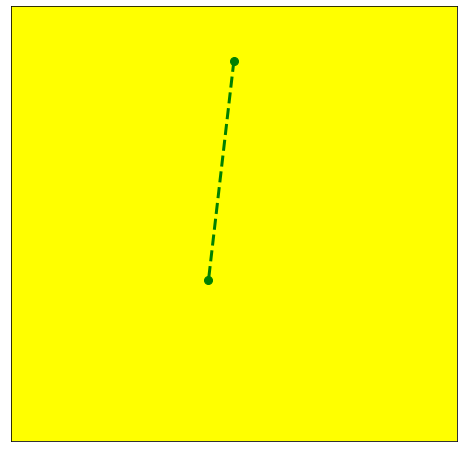

In [9]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter


def animate(i):
    ln1.set_data([0, x[i]], [0, y[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('yellow')
ax.get_xaxis().set_ticks([])  
ax.get_yaxis().set_ticks([])    
ln1, = plt.plot([], [], 'go--', lw=3, markersize=8)
ax.set_ylim(-7,1)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pendulum with spring.gif',writer='pillow',fps=25)